In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

In [2]:
DATA_PATH = "data/"

# Loading Dataset

In [3]:
from caits.loading import audio_loader

In [4]:
df_kws = audio_loader(dataset_path=DATA_PATH + "dataset_speech_commands", mode="pydub", channels=["mono"], export="df")

Loading audio files: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 799/799 [00:00<00:00, 6092.03it/s]


In [5]:
df_kws.head()

,X,y,id
0,mono 0 135 1 207 2 24...,no,2f813234_nohash_1.wav
1,mono 0 -14 1 -28 2 41...,no,97f4c236_nohash_2.wav
2,mono 0 -1 1 2 2 ...,no,5c8af87a_nohash_0.wav
3,mono 0 -1 1 -2 2 -...,no,7fd25f7c_nohash_2.wav
4,mono 0 -4 1 16 2 2...,no,3aa6f4e2_nohash_0.wav


In [6]:
df_kws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       799 non-null    object
 1   y       799 non-null    object
 2   id      799 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB


In [7]:
audio = df_kws["X"].iloc[0]

In [8]:
audio.shape

(16000, 1)

In [9]:
from caits.visualization import plot_signal

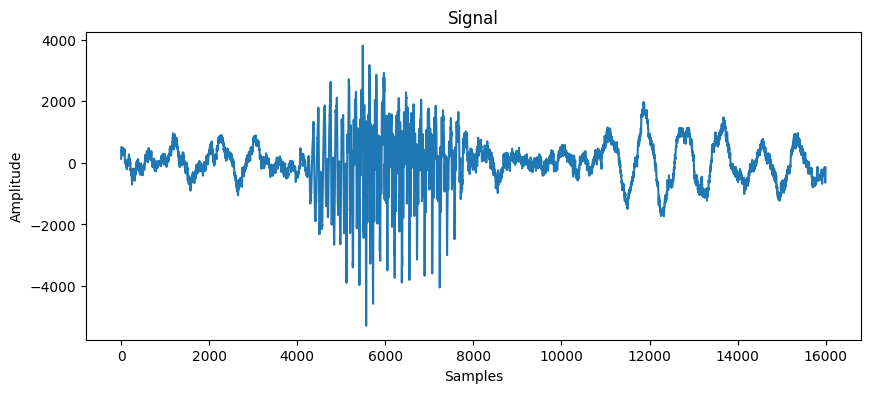

In [10]:
plot_signal(audio, return_mode=False)

# Windowing

In [11]:
from caits.windowing import rolling_window_df

## Windowing a single Audio

In [12]:
windows_of_simple_df = rolling_window_df(audio, ws=500, overlap=250, w_type="hann", w_center=False, print_stats=False)

In [13]:
windows_of_simple_df[0].head()

,mono
1,207
2,246
3,301
4,333
5,355


<Axes: >

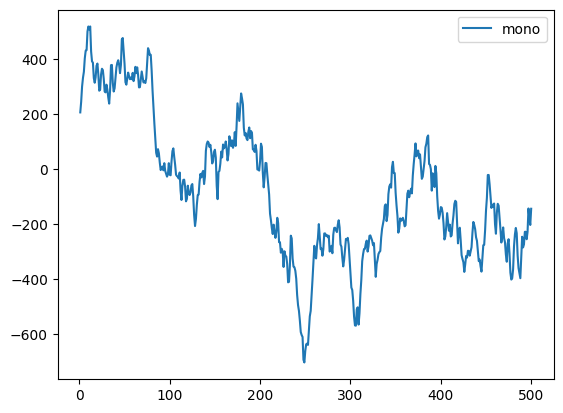

In [14]:
windows_of_simple_df[0].plot()

<Axes: >

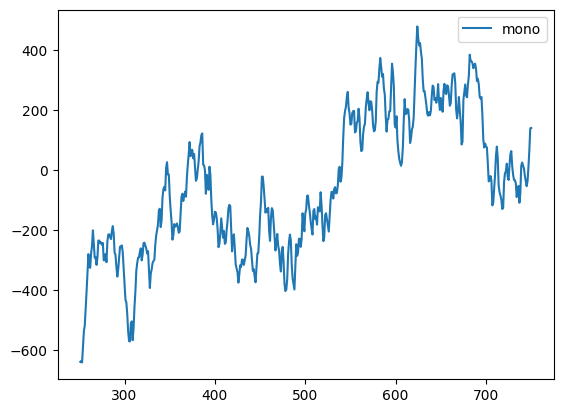

In [15]:
windows_of_simple_df[1].plot()

## Windowing the whole Dataset

In [16]:
from caits.utils import df_list_to_array
from caits.windowing import windowing_df

In [17]:
data = windowing_df(df_kws, ws=500, overlap=250, mode="dict")

In [18]:
len(data["y"])

48852

In [19]:
X = df_list_to_array(data["X"])

In [20]:
X.shape

(48852, 500, 1)

In [21]:
X[0].shape

(500, 1)

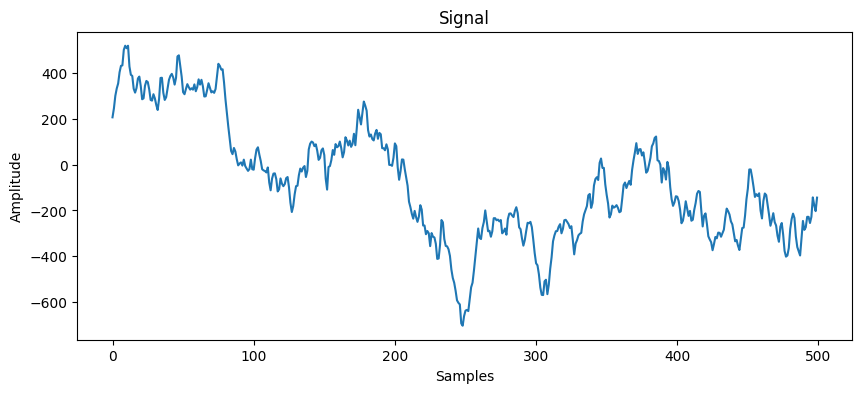

In [22]:
plot_signal(X[0], return_mode=False)

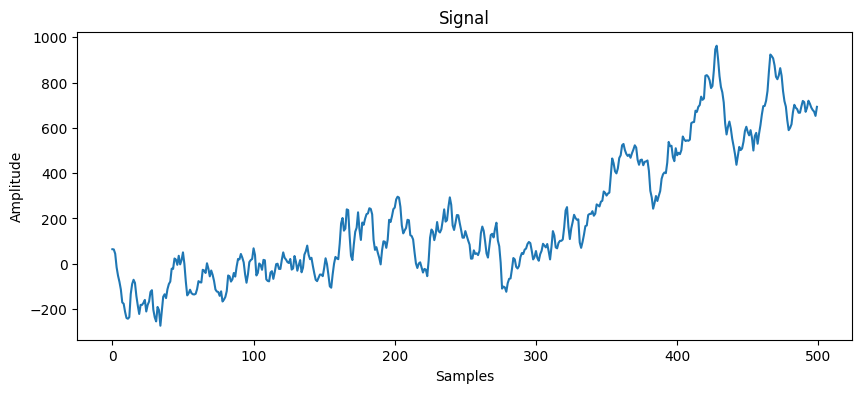

In [23]:
plot_signal(X[3], return_mode=False)

# Chunks

In [24]:
from caits.windowing import create_chunks
from caits.loading import wav_specs_check, wav_loader

In [25]:
audio_params = wav_specs_check(DATA_PATH + "instances/yes.wav")

Sample rate: 16000 Hz
Mono


In [26]:
audio_params

{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

In [27]:
yes_audio_df = wav_loader(file_path=DATA_PATH + "instances/yes.wav")
yes_audio = yes_audio_df["channel_1"].values

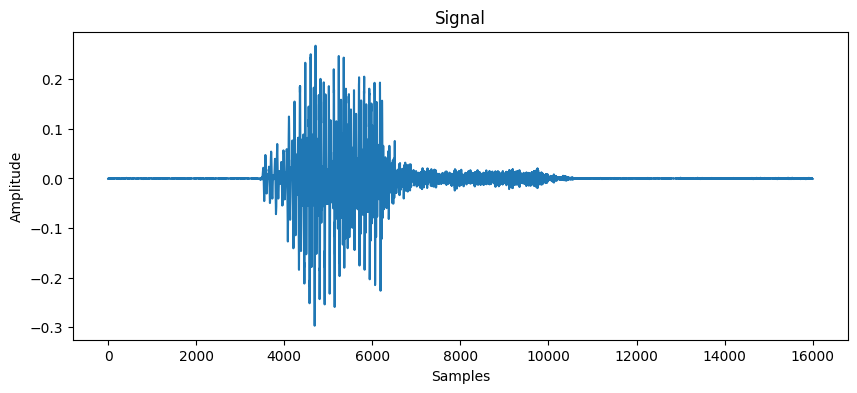

In [28]:
plot_signal(yes_audio, return_mode=False)

In [29]:
chunks = create_chunks(yes_audio, chunk_length=8000)

In [30]:
len(chunks)

2

In [31]:
chunks[0].shape

(8000,)

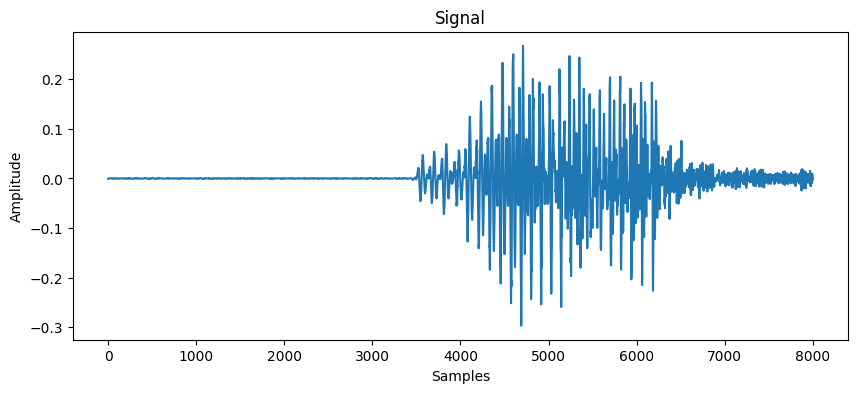

In [32]:
plot_signal(chunks[0], return_mode=False)

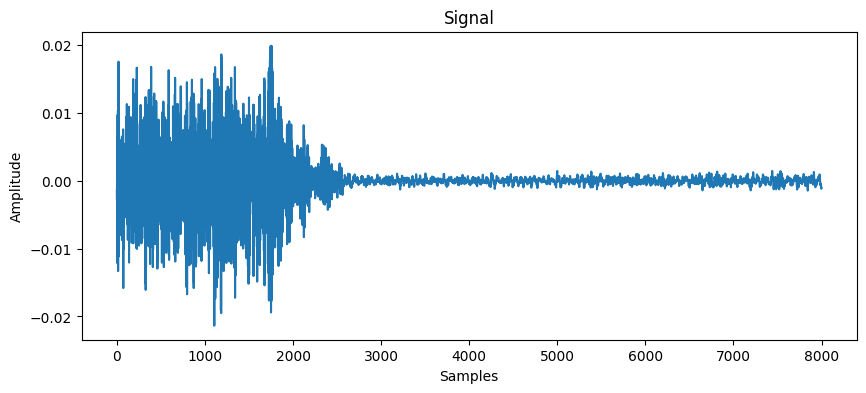

In [33]:
plot_signal(chunks[1], return_mode=False)